## In の固液相転移

DSC のデータは測定装置の都合上符号が逆になっている。

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
def SimpsonIntegral(x, y, start_index = 0, end_index = 3899):
    dx    = x[1]-x[0]
    res = np.array([])
    for time_index in range(start_index, end_index):
        integrated_value = dx/3 * (y[start_index] + 2*np.sum(y[start_index:time_index:2]) + 4*np.sum(y[start_index+1:time_index:2]) + y[time_index])
        res = np.append(res, integrated_value)
    return res

def MidpointIntefral(x, y, start_index = 0, end_index = 3899):
    dx    = x[1]-x[0]
    res = np.array([])
    for time_index in range(start_index, end_index):
        integrated_value = dx * np.sum(y[start_index:time_index])
        res = np.append(res, integrated_value)
    return res

def calcDelta(Time, Delta, start_index, end_index):

    res1=np.polyfit(np.concatenate([Time[start_index-100:start_index], Time[end_index:end_index+100]]),
                    np.concatenate([Delta[start_index-100:start_index], Delta[end_index:end_index+100]]), 1)

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.set_xlim(Time[start_index-20],Time[end_index+20])
    ax1.set_ylim(np.min(Delta[start_index:end_index]),np.max(Delta[start_index:end_index]))
    ax1.set_xlabel("Time (sec)")
    ax1.set_ylabel("Delta")

    ax1.plot(Time, Delta, c="tab:orange")
    ax1.plot(Time, res1[0]*Time+res1[1], c="tab:red")

    Integral_val = MidpointIntefral(Time, Delta-(res1[0]*Time+res1[1]), start_index, end_index)

    ax2 = ax1.twinx()
    # ax2.set_ylim(np.min(Integral_val),np.max(Integral_val))
    ax2.set_ylabel("Integral")
    ax2.plot(Time[start_index:end_index], Integral_val, c = "tab:blue")
    # ax1.set_title("$Integral \Delta =$  {:d}".format(int(Integral_val[-1])))
    plt.show()
    return Integral_val[-1]

測定データのインポート

In [3]:
df = pd.read_csv("2024_11_08/In.csv",
                encoding = 'shift_jis',
                skiprows = 30,
                usecols  = [0, 1, 2])

                                                                     # 単位
Time = df.iloc[:,0].to_numpy() * 60                                  # sec
Temp = df.iloc[:,1].to_numpy() + 273.15                              # K
Dsc  =-df.iloc[:,2].to_numpy() * 10**(-6)                            # W

del df

In [4]:
Cp   = Dsc[1:] * (Time[1:] - Time[:-1])/(Temp[1:]-Temp[:-1]) * 1000  # J/g・K
mol  = 0.001 / 114.818
dHdt = Dsc / mol
dSdt = dHdt / Temp

C:\Users\xiang\AppData\Local\Temp\ipykernel_26096\2640943616.py:1: RuntimeWarning: divide by zero encountered in divide
  Cp   = Dsc[1:] * (Time[1:] - Time[:-1])/(Temp[1:]-Temp[:-1]) * 1000  # J/g・K


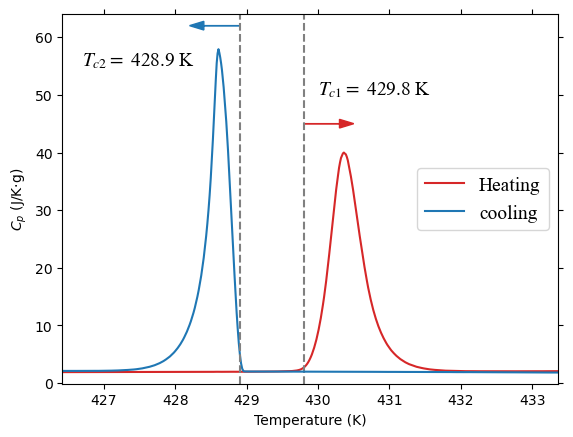

In [5]:
f = plt.figure()
ax1 = f.add_subplot(111)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] ='Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

xlim = (Temp[500], Temp[2500])
ax1.set_xlim(xlim[0], xlim[1])
ylim = (-0.1, 64)
ax1.set_ylim(ylim[0], ylim[1])

ax1.set_xlabel("Temperature (K)")
ax1.set_ylabel("$C_p$ (J/K$\cdot$g)")
ax1.plot(Temp[500:1000], Cp[500:1000], label="Heating", color = "tab:red")
ax1.arrow(429.8, 45, 0.7, 0,
          width = 0.01, head_width = 1.5, head_length = 0.2, length_includes_head=True, color="tab:red")
ax1.vlines(429.8, ylim[0], ylim[1], linestyles = "dashed", color ="grey")
ax1.text(430, 50, "$T_{c1}=$ 429.8 K")

ax1.plot(Temp[2500:3000], Cp[2500:3000], label="cooling", color = "tab:blue")
ax1.arrow(428.9, 62, -0.7, 0,
          width = 0.01, head_width = 1.5, head_length = 0.2, length_includes_head=True, color="tab:blue")
ax1.vlines(428.9, ylim[0], ylim[1], linestyles = "dashed", color ="grey")
ax1.text(426.7, 55, "$T_{c2}=$ 428.9 K")

ax1.legend()

plt.show()
del f, ax1, xlim, ylim

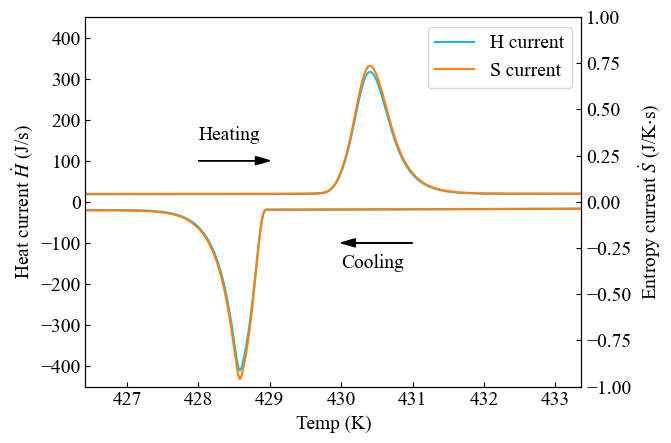

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

xlim = (Temp[500], Temp[2500])
ax1.set_xlim(xlim[0], xlim[1])
y1lim = (-450, 450)
ax1.set_ylim(y1lim[0], y1lim[1])

ax1.set_xlabel("Temp (K)")
ax1.set_ylabel("Heat current $\dot{H}$ (J/s)")

ax1.plot(Temp[500:1000], dHdt[500:1000], color="tab:cyan", label="H current")
ax1.plot(Temp[2500:3000], dHdt[2500:3000], color="tab:cyan")
h1, l1 = ax1.get_legend_handles_labels()
ax1.arrow(428, 100, 1, 0,
          width = 0.1, head_width = 20, head_length = 0.2, length_includes_head=True, color="black")
ax1.text(428, 150, "Heating")

ax2 = ax1.twinx()
ax2.set_ylabel("Entropy current $\dot{S}$ (J/K$\cdot$s)")
ax2.set_ylim(-1, 1)
ax2.plot(Temp[500:1000], dSdt[500:1000], c = "tab:orange", label = "S current")
ax2.plot(Temp[2500:3000], dSdt[2500:3000], c = "tab:orange")
h2, l2 = ax2.get_legend_handles_labels()
ax1.arrow(431, -100, -1, 0,
          width = 0.1, head_width = 20, head_length = 0.2, length_includes_head=True, color="black")
ax1.text(430, -160, "Cooling")

ax1.legend(h1+h2, l1+l2)

plt.show()

del fig, ax1, ax2, xlim, y1lim, h1, h2, l1, l2

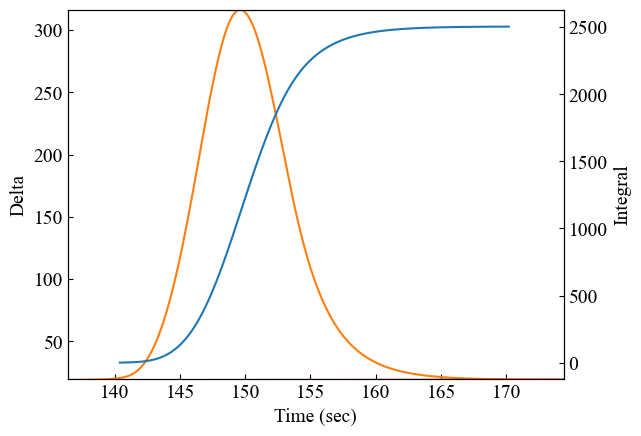

2504.831615216735


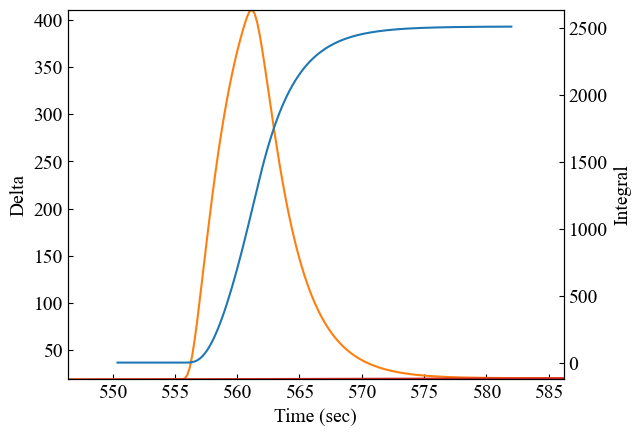

2510.3967696420073


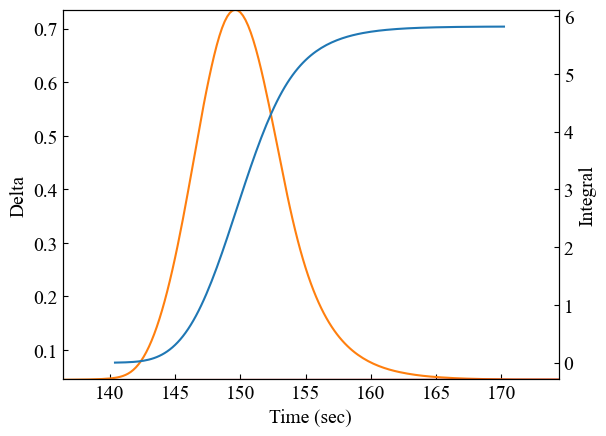

5.818974212991065


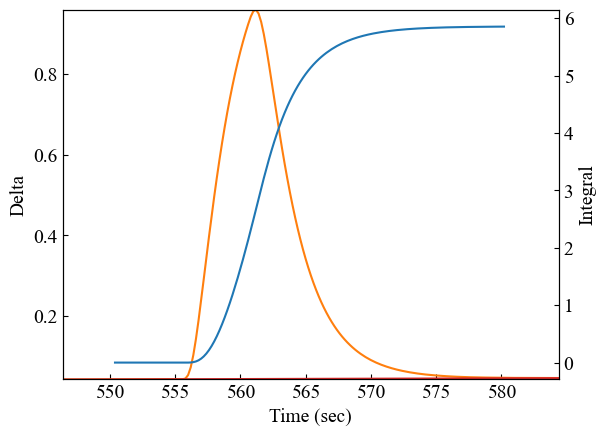

5.8542464373981975


In [7]:
print(calcDelta(Time, dHdt, 700, 850))
print(calcDelta(Time, -dHdt, 2750, 2909))
print(calcDelta(Time, dSdt, 700, 850))
print(calcDelta(Time, -dSdt, 2750, 2900))